In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm,skew
from scipy import stats
import datetime as dt
%matplotlib inline

In [13]:
!pip list

Package                       Version
----------------------------- ---------
aiofiles                      22.1.0
aiohttp                       3.8.5
aiosignal                     1.3.1
aiosqlite                     0.18.0
alabaster                     0.7.12
anaconda-client               1.11.2
anaconda-navigator            2.4.2
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
applaunchservices             0.3.0
appnope                       0.1.2
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
asttokens                     2.0.5
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs                         22.1.0
autopep8                      1.6.0
Babel                         2.11.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weak

In [14]:
new = pd.read_csv('/Users/asamitakeuchi/elo/new_merchant_transactions.csv')

In [15]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1963031 entries, 0 to 1963030
Data columns (total 14 columns):
 #   Column                Dtype  
---  ------                -----  
 0   authorized_flag       object 
 1   card_id               object 
 2   city_id               int64  
 3   category_1            object 
 4   installments          int64  
 5   category_3            object 
 6   merchant_category_id  int64  
 7   merchant_id           object 
 8   month_lag             int64  
 9   purchase_amount       float64
 10  purchase_date         object 
 11  category_2            float64
 12  state_id              int64  
 13  subsector_id          int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 209.7+ MB


In [16]:
new_cleaned = new.dropna()

In [17]:
to_year = pd.to_datetime(new_cleaned['purchase_date'])
new_cleaned.loc[:,'year'] = to_year.dt.year
new_cleaned.loc[:,'date'] = to_year.dt.date

/var/folders/4q/l2gmsjv54v798c238tjz865h0000gn/T/ipykernel_7581/1329150640.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_cleaned.loc[:,'year'] = to_year.dt.year
/var/folders/4q/l2gmsjv54v798c238tjz865h0000gn/T/ipykernel_7581/1329150640.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_cleaned.loc[:,'date'] = to_year.dt.date


In [18]:
new_cleaned.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id,year,date
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.557574,2018-03-11 14:57:36,1.0,9,19,2018,2018-03-11
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.569580,2018-03-19 18:53:37,1.0,9,19,2018,2018-03-19
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.551037,2018-04-26 14:08:44,1.0,9,14,2018,2018-04-26
5,Y,C_ID_ef55cf8d4b,231,N,1,B,367,M_ID_8874615e00,2,-0.633007,2018-04-02 12:53:28,1.0,9,16,2018,2018-04-02
6,Y,C_ID_ef55cf8d4b,69,N,1,B,333,M_ID_6d061b5ddc,1,5.263697,2018-03-28 19:50:19,1.0,9,10,2018,2018-03-28


In [19]:
new_cleaned.groupby('date').agg(['count','min','max'])

authorized_flag         card_id                                    \
                     count min max   count              min              max   
date                                                                           
2017-03-01              44   Y   Y      44  C_ID_02b784297f  C_ID_fabd47ca44   
2017-03-02              43   Y   Y      43  C_ID_02b784297f  C_ID_ea85d16801   
2017-03-03              29   Y   Y      29  C_ID_024a3f06c2  C_ID_f720b6dc54   
2017-03-04              53   Y   Y      53  C_ID_024a3f06c2  C_ID_f720b6dc54   
2017-03-05              41   Y   Y      41  C_ID_0c9d3d6fe4  C_ID_d4eca62a41   
...                    ...  ..  ..     ...              ...              ...   
2018-04-26           18688   Y   Y   18688  C_ID_000183fdda  C_ID_fffd351e7f   
2018-04-27           22261   Y   Y   22261  C_ID_000599daf9  C_ID_fffeced303   
2018-04-28           27397   Y   Y   27397  C_ID_0009150c11  C_ID_ffff828181   
2018-04-29           16608   Y   Y   16608  C_ID_0001238066  C_ID_ffff828181   
2018-04-30           23906   Y   Y   23906  C_ID_0001238066  C_ID_fffeed3a89   

           city_id          category_1  ... category_2 state_id          \
             count min  max      count  ...        max    count min max   
date                                    ...                               
2017-03-01      44  14  347         44  ...        5.0       44   4  24   
2017-03-02      43  13  333         43  ...        5.0       43   1  22   
2017-03-03      29  14  333         29  ...        5.0       29   4  22   
2017-03-04      53   8  333         53  ...        5.0       53   1  23   
2017-03-05      41   8  339         41  ...        5.0       41   4  23   
...            ...  ..  ...        ...  ...        ...      ...  ..  ..   
2018-04-26   18688   1  347      18688  ...        5.0    18688   1  24   
2018-04-27   22261   1  347      22261  ...        5.0    22261   1  24   
2018-04-28   27397   1  347      27397  ...        5.0    27397   1  24   
2018-04-29   16608   1  347      16608  ...        5.0    16608   1  24   
2018-04-30   23906   1  347      23906  ...        5.0    23906   1  24   

           subsector_id           year              
                  count min max  count   min   max  
date                                                
2017-03-01           44   1  39     44  2017  2017  
2017-03-02           43   1  39     43  2017  2017  
2017-03-03           29   1  39     29  2017  2017  
2017-03-04           53   1  40     53  2017  2017  
2017-03-05           41   1  39     41  2017  2017  
...                 ...  ..  ..    ...   ...   ...  
2018-04-26        18688   1  41  18688  2018  2018  
2018-04-27        22261   1  41  22261  2018  2018  
2018-04-28        27397   1  41  27397  2018  2018  
2018-04-29        16608   1  41  16608  2018  2018  
2018-04-30        23906   1  41  23906  2018  2018  

[426 rows x 45 columns]

In [20]:
#The dataset contains the data from 2017/03/01 to 2018/04/30
#Here, I am going to use the annual data from 2017/03/01 to 2018/02/28
start_date = pd.to_datetime('2017-03-01')
end_date = pd.to_datetime('2018-02-28')
filtered = new_cleaned[(new_cleaned['date']>= pd.Timestamp(start_date)) & (new_cleaned['date']<= pd.Timestamp(end_date))].copy()
filtered.groupby('date').agg(['count','min','max'])

/Users/asamitakeuchi/anaconda3/lib/python3.10/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


authorized_flag         card_id                                    \
                     count min max   count              min              max   
date                                                                           
2017-03-01              44   Y   Y      44  C_ID_02b784297f  C_ID_fabd47ca44   
2017-03-02              43   Y   Y      43  C_ID_02b784297f  C_ID_ea85d16801   
2017-03-03              29   Y   Y      29  C_ID_024a3f06c2  C_ID_f720b6dc54   
2017-03-04              53   Y   Y      53  C_ID_024a3f06c2  C_ID_f720b6dc54   
2017-03-05              41   Y   Y      41  C_ID_0c9d3d6fe4  C_ID_d4eca62a41   
...                    ...  ..  ..     ...              ...              ...   
2018-02-24            4456   Y   Y    4456  C_ID_001da949e5  C_ID_ffeccd43c9   
2018-02-25            2611   Y   Y    2611  C_ID_000b0305d9  C_ID_ffec615a26   
2018-02-26            2679   Y   Y    2679  C_ID_0041a5cbaf  C_ID_ffec95782a   
2018-02-27            2950   Y   Y    2950  C_ID_001676af4f  C_ID_fff3b3d49e   
2018-02-28            3237   Y   Y    3237  C_ID_001da949e5  C_ID_fffd943b91   

           city_id          category_1  ... category_2 state_id          \
             count min  max      count  ...        max    count min max   
date                                    ...                               
2017-03-01      44  14  347         44  ...        5.0       44   4  24   
2017-03-02      43  13  333         43  ...        5.0       43   1  22   
2017-03-03      29  14  333         29  ...        5.0       29   4  22   
2017-03-04      53   8  333         53  ...        5.0       53   1  23   
2017-03-05      41   8  339         41  ...        5.0       41   4  23   
...            ...  ..  ...        ...  ...        ...      ...  ..  ..   
2018-02-24    4456   1  347       4456  ...        5.0     4456   1  24   
2018-02-25    2611   1  347       2611  ...        5.0     2611   1  24   
2018-02-26    2679   1  347       2679  ...        5.0     2679   1  24   
2018-02-27    2950   1  347       2950  ...        5.0     2950   1  24   
2018-02-28    3237   1  345       3237  ...        5.0     3237   1  24   

           subsector_id          year              
                  count min max count   min   max  
date                                               
2017-03-01           44   1  39    44  2017  2017  
2017-03-02           43   1  39    43  2017  2017  
2017-03-03           29   1  39    29  2017  2017  
2017-03-04           53   1  40    53  2017  2017  
2017-03-05           41   1  39    41  2017  2017  
...                 ...  ..  ..   ...   ...   ...  
2018-02-24         4456   1  41  4456  2018  2018  
2018-02-25         2611   1  41  2611  2018  2018  
2018-02-26         2679   1  41  2679  2018  2018  
2018-02-27         2950   1  41  2950  2018  2018  
2018-02-28         3237   1  41  3237  2018  2018  

[365 rows x 45 columns]

In [21]:
#Creating RFM variables

In [22]:
#Frequency dataset
Frequency_filtered = filtered.groupby('card_id').purchase_date.count().reset_index(name='frequency')
Frequency_filtered.head()

,card_id,frequency
0,C_ID_0001793786,29
1,C_ID_0002ba3c2e,3
2,C_ID_0002c7c2c1,3
3,C_ID_00032df08f,7
4,C_ID_0003754056,1


In [23]:
#Recency dataset
most_recent = filtered['date'].max()+dt.timedelta(days=1)
print(most_recent)

2018-03-01


In [24]:
Recency_filtered = filtered.groupby('card_id').date.agg(lambda x:(most_recent - x.max())).reset_index(name='recency')
print(Recency_filtered )

               card_id  recency
0      C_ID_0001793786  60 days
1      C_ID_0002ba3c2e  79 days
2      C_ID_0002c7c2c1  15 days
3      C_ID_00032df08f  31 days
4      C_ID_0003754056  18 days
...                ...      ...
76430  C_ID_fffb79fb56 238 days
76431  C_ID_fffbdf036b 213 days
76432  C_ID_fffbee5c24  17 days
76433  C_ID_fffd337484 156 days
76434  C_ID_fffd943b91   1 days

[76435 rows x 2 columns]


In [25]:
#Monetary Value dataset
#The purchase amount here is normalized
#Going to add 1 to be able to calculate the sum
filtered['purchase_amount'] = filtered['purchase_amount'] +1
Monetary_filtered = filtered.groupby('card_id').purchase_amount.sum().reset_index(name='monetary')
print(Monetary_filtered)

               card_id   monetary
0      C_ID_0001793786  29.916332
1      C_ID_0002ba3c2e   0.928941
2      C_ID_0002c7c2c1   1.117869
3      C_ID_00032df08f   4.848985
4      C_ID_0003754056   0.290658
...                ...        ...
76430  C_ID_fffb79fb56   0.328225
76431  C_ID_fffbdf036b   7.126457
76432  C_ID_fffbee5c24   0.508543
76433  C_ID_fffd337484   2.451263
76434  C_ID_fffd943b91   0.705962

[76435 rows x 2 columns]


In [26]:
rfm = pd.merge(Recency_filtered, Frequency_filtered, on='card_id', how='outer')
rfm = pd.merge(rfm, Monetary_filtered, on='card_id', how='outer')
rfm.head()

,card_id,recency,frequency,monetary
0,C_ID_0001793786,60 days,29,29.916332
1,C_ID_0002ba3c2e,79 days,3,0.928941
2,C_ID_0002c7c2c1,15 days,3,1.117869
3,C_ID_00032df08f,31 days,7,4.848985
4,C_ID_0003754056,18 days,1,0.290658


In [27]:
#Assign RFM scores
#
recency_scores = range(5,0,-1)
frequency_scores = range(1,6)
monetary_scores = range(1,6)

rfm['r'] = pd.cut(rfm['recency'], bins=5, labels = recency_scores)
rfm['f'] = pd.cut(rfm['frequency'], bins=5, labels = frequency_scores)
rfm['m'] = pd.cut(rfm['monetary'], bins=5, labels = monetary_scores)

In [28]:
def rfm_segment(x):
    return str(x['r'])+str(x['f'])+str(x['m'])

rfm['rfm']=rfm.apply(rfm_segment, axis=1)
rfm['rfm points']=rfm[['r','f','m']].sum(axis=1)
rfm.head()

,card_id,recency,frequency,monetary,r,f,m,rfm,rfm points
0,C_ID_0001793786,60 days,29,29.916332,5,2,2,522,9
1,C_ID_0002ba3c2e,79 days,3,0.928941,4,1,1,411,6
2,C_ID_0002c7c2c1,15 days,3,1.117869,5,1,1,511,7
3,C_ID_00032df08f,31 days,7,4.848985,5,1,1,511,7
4,C_ID_0003754056,18 days,1,0.290658,5,1,1,511,7


In [29]:
rfm.groupby('r').recency.agg(['mean','min','max'])

,mean,min,max
r,,,
5,25 days 02:45:56.321993937,1 days,73 days
4,107 days 07:34:05.418443888,74 days,145 days
3,180 days 02:32:38.416804434,146 days,218 days
2,253 days 07:33:34.641120960,219 days,290 days
1,305 days 09:47:14.341463416,291 days,363 days


In [30]:
rfm.groupby('rfm').agg(['min','max','mean','count'])

/var/folders/4q/l2gmsjv54v798c238tjz865h0000gn/T/ipykernel_7581/1766204434.py:1: FutureWarning: ['card_id', 'r', 'f', 'm'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  rfm.groupby('rfm').agg(['min','max','mean','count'])


recency                                             frequency      \
         min      max                        mean  count       min max   
rfm                                                                      
111 291 days 363 days 305 days 09:49:25.349544072    987         1  19   
121 292 days 317 days           305 days 08:00:00     33        20  38   
131 305 days 307 days           305 days 14:24:00      5        43  54   
211 219 days 290 days 253 days 02:01:21.706763504   6609         1  19   
214 222 days 222 days           222 days 00:00:00      1        13  13   
221 219 days 290 days 257 days 04:24:49.655172412    348        20  38   
222 246 days 282 days           268 days 08:00:00      3        22  30   
231 223 days 287 days 261 days 17:27:16.363636364     22        39  55   
232 248 days 248 days           248 days 00:00:00      1        54  54   
241 245 days 274 days           251 days 04:48:00      5        57  73   
242 222 days 276 days           247 days 16:00:00      3        58  63   
251 274 days 274 days           274 days 00:00:00      1        79  79   
252 245 days 245 days           245 days 00:00:00      1        81  81   
311 146 days 218 days 179 days 22:02:45.663716814   9605         1  19   
312 161 days 215 days           191 days 00:00:00      4         1  17   
321 152 days 218 days           182 days 16:00:00    606        20  38   
322 187 days 187 days           187 days 00:00:00      1        33  33   
323 216 days 216 days           216 days 00:00:00      1        23  23   
331 152 days 216 days           181 days 15:30:00     48        39  56   
332 154 days 213 days           183 days 06:00:00      4        43  54   
341 182 days 217 days           198 days 20:00:00      6        57  68   
342 152 days 216 days           183 days 08:00:00      6        58  74   
352 152 days 152 days           152 days 00:00:00      2        82  83   
411  74 days 145 days 107 days 08:05:33.880998080  13025         1  19   
412 102 days 125 days           114 days 12:00:00      4         2  13   
421  74 days 144 days 107 days 03:50:17.341040462    519        20  38   
422  82 days  95 days            91 days 00:00:00      4        23  30   
431  84 days 132 days           103 days 00:00:00     38        39  56   
432  91 days 122 days           106 days 12:00:00      2        46  56   
441  91 days 122 days           102 days 16:00:00      3        57  65   
442  91 days 122 days           111 days 08:00:00      3        69  73   
511   1 days  73 days  24 days 22:58:12.165318539  42899         1  19   
512   2 days  64 days  23 days 15:25:42.857142857     14         1  19   
514  13 days  43 days            28 days 08:00:00      3         4  13   
521   1 days  73 days  29 days 10:09:22.962962963   1458        20  38   
522   1 days  64 days  22 days 11:17:38.823529411     17        20  35   
525  44 days  44 days            44 days 00:00:00      1        22  22   
531   1 days  70 days  30 days 02:48:38.918918919    111        39  55   
532   1 days  63 days            19 days 21:36:00     10        39  55   
533   2 days   2 days             2 days 00:00:00      1        45  45   
541   3 days  66 days            39 days 21:00:00      8        57  70   
542   1 days  62 days            26 days 08:00:00      9        57  66   
551   1 days   1 days             1 days 00:00:00      1        78  78   
552   1 days  29 days            10 days 08:00:00      3        78  94   

                         monetary                                rfm points  \
          mean  count         min         max        mean  count        min   
rfm                                                                           
111   4.787234    987    0.257044   18.137648    2.028817    987          3   
121  24.969697     33    6.477148   18.825423   11.083485     33          4   
131  48.000000      5   13.277064   21.149791   18.382505      5          5   
211   6.149190   6609    0.253107   23.668269    2.4

In [31]:
#The leargest to smallest segments are as follows:
rfm.groupby(['rfm']).size().sort_values(ascending=False)

rfm
511    42899
411    13025
311     9605
211     6609
521     1458
111      987
321      606
421      519
221      348
531      111
331       48
431       38
121       33
231       22
522       17
512       14
532       10
542        9
541        8
341        6
342        6
131        5
241        5
332        4
412        4
422        4
312        4
514        3
442        3
552        3
441        3
242        3
222        3
432        2
352        2
323        1
322        1
252        1
251        1
525        1
232        1
533        1
214        1
551        1
dtype: int64

In [32]:
rfm.groupby(['rfm points']).size().sort_values(ascending=False)

rfm points
7     43478
6     13660
5      9958
4      6642
8      1529
3       987
9       140
10       26
11       11
12        4
dtype: int64

In [33]:
#There are 5x5x5 = 125 segments here
#We can segment them into 'Top tier', 'High tier','Mid-high tier','Mid-tier', and 'Low tier'customers 
segment_range = range(1, 126)
tier_labels = ['Top tier', 'High tier','Mid-high tier','Mid-tier','Low tier']

rfm['Tier'] = pd.cut(rfm['rfm points'], bins=5, labels=tier_labels)
rfm.head()

,card_id,recency,frequency,monetary,r,f,m,rfm,rfm points,Tier
0,C_ID_0001793786,60 days,29,29.916332,5,2,2,522,9,Mid-tier
1,C_ID_0002ba3c2e,79 days,3,0.928941,4,1,1,411,6,High tier
2,C_ID_0002c7c2c1,15 days,3,1.117869,5,1,1,511,7,Mid-high tier
3,C_ID_00032df08f,31 days,7,4.848985,5,1,1,511,7,Mid-high tier
4,C_ID_0003754056,18 days,1,0.290658,5,1,1,511,7,Mid-high tier


In [34]:
rfm_tier = rfm.groupby('Tier').size()
print(rfm_tier)

Tier
Top tier          7629
High tier        23618
Mid-high tier    45007
Mid-tier           166
Low tier            15
dtype: int64


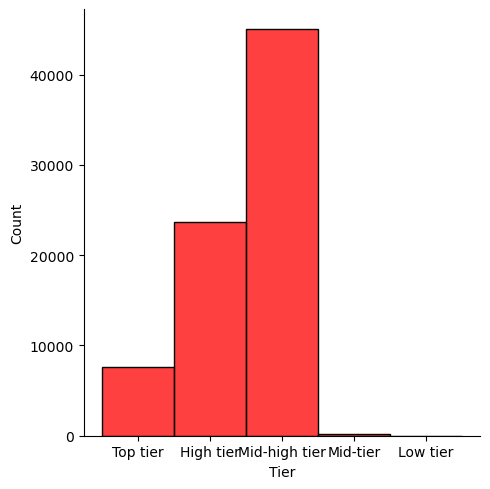

In [35]:
sns.displot(rfm['Tier'], color='red')
plt.title = ('Numbers of Custoemrs by different Tiers')
plt.xlabel = ('Customer Tier')

In [36]:
#Perform KMeans clustreing in the following order:
#(Pre-processing)Visualize the RFM values; perform feature engineering if needed
#determine the number of clusters to show
#perform Kmeans Clustering
#visualize the results

In [37]:
#(Pre-processing)Visualize the RFM values
rfm_vals = rfm[['recency','frequency','monetary']]

In [38]:
rfm_vals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76435 entries, 0 to 76434
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype          
---  ------     --------------  -----          
 0   recency    76435 non-null  timedelta64[ns]
 1   frequency  76435 non-null  int64          
 2   monetary   76435 non-null  float64        
dtypes: float64(1), int64(1), timedelta64[ns](1)
memory usage: 2.3 MB


In [39]:
rfm_vals.head()

,recency,frequency,monetary
0,60 days,29,29.916332
1,79 days,3,0.928941
2,15 days,3,1.117869
3,31 days,7,4.848985
4,18 days,1,0.290658


In [40]:
#the datatype of recency is in string. 
#change them to int
rfm_vals.loc[:,'recency'] = rfm_vals['recency'].astype(int)
rfm_vals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76435 entries, 0 to 76434
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   recency    76435 non-null  int64  
 1   frequency  76435 non-null  int64  
 2   monetary   76435 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 2.3 MB


/var/folders/4q/l2gmsjv54v798c238tjz865h0000gn/T/ipykernel_7581/996809505.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_vals.loc[:,'recency'] = rfm_vals['recency'].astype(int)


In [41]:
rfm_vals.describe()

,recency,frequency,monetary
count,7.643500e+04,76435.000000,76435.000000
mean,7.363854e+15,5.976843,2.481332
std,7.266231e+15,6.374117,3.098780
min,8.640000e+13,1.000000,0.253107
25%,1.296000e+15,2.000000,0.683354
50%,4.752000e+15,4.000000,1.510393
75%,1.200960e+16,8.000000,3.105948
max,3.136320e+16,94.000000,130.421617


In [42]:
rfm_vals.head()

,recency,frequency,monetary
0,5184000000000000,29,29.916332
1,6825600000000000,3,0.928941
2,1296000000000000,3,1.117869
3,2678400000000000,7,4.848985
4,1555200000000000,1,0.290658


In [43]:
#The variance and std of data are too diffrent, which can cause inaccuracy in clustering
#Will solve this problem by normalization

/var/folders/4q/l2gmsjv54v798c238tjz865h0000gn/T/ipykernel_7581/2453572672.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 1, 1); sns.histplot(rfm_vals.recency, label = 'Recency')


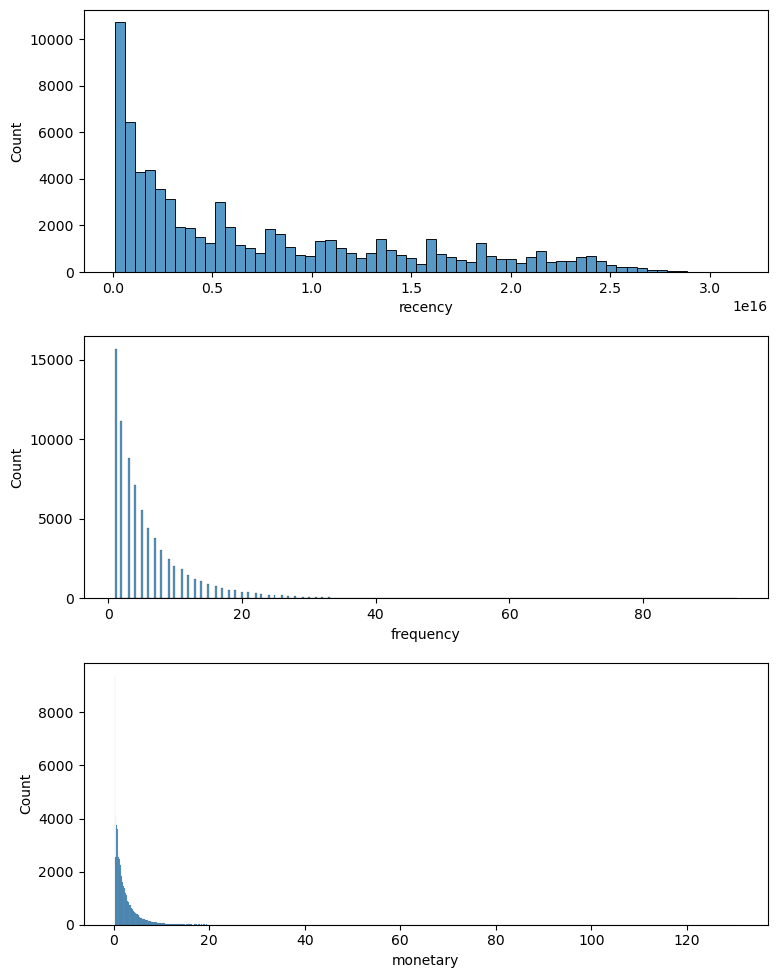

In [44]:
#Check the distribution of data
f,ax = plt.subplots(figsize=(8, 10))
plt.subplot(3, 1, 1); sns.histplot(rfm_vals.recency, label = 'Recency')
plt.subplot(3, 1, 2); sns.histplot(rfm_vals.frequency, label = 'Frequency')
plt.subplot(3, 1, 3); sns.histplot(rfm_vals.monetary, label = 'Monetary Value')
plt.style.use('fivethirtyeight')
plt.tight_layout()
plt.show()

/var/folders/4q/l2gmsjv54v798c238tjz865h0000gn/T/ipykernel_7581/210126296.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 1, 1); sns.histplot(rfm_vals_log.recency, label = 'Recency')


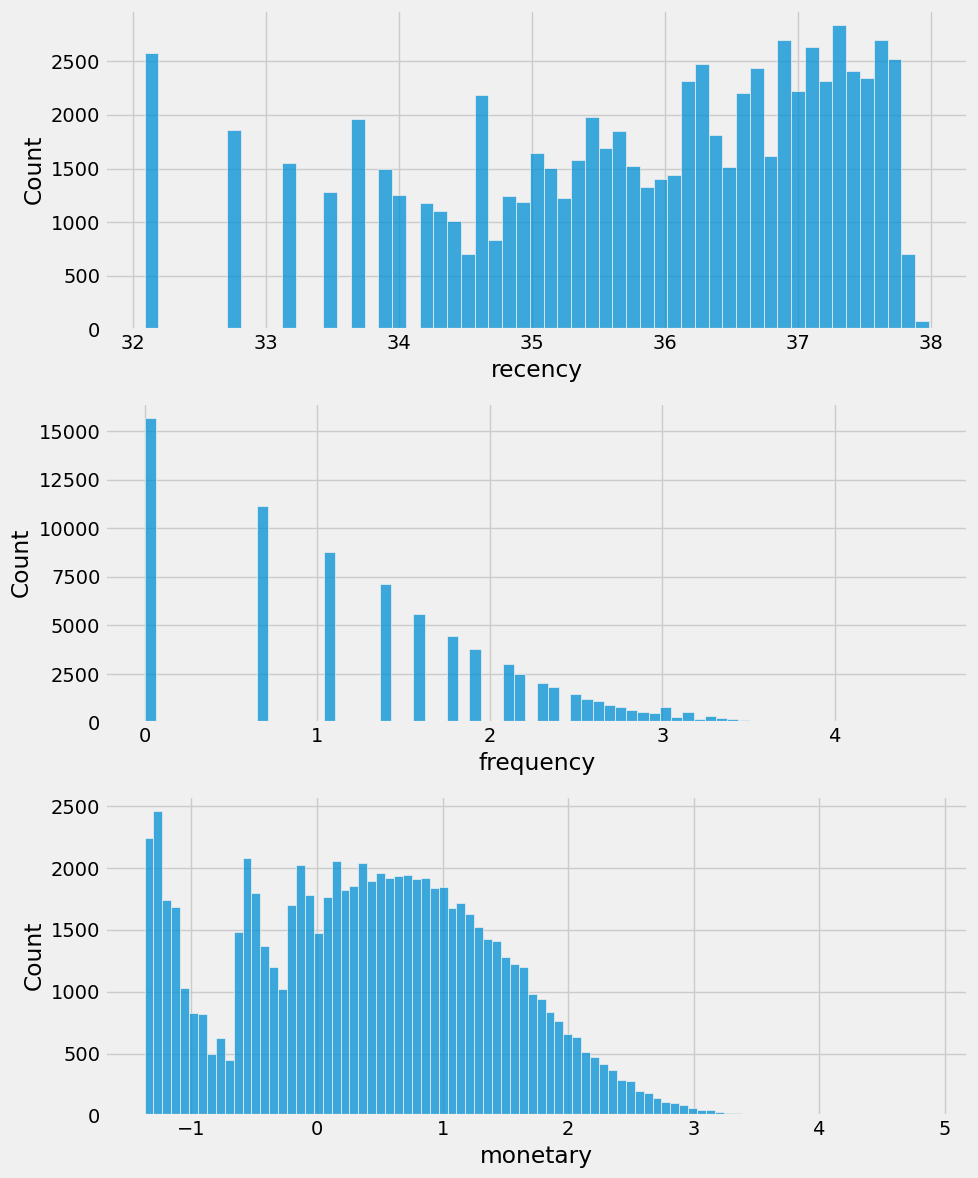

In [45]:
#skewed dataset problem
#use logarithm transformation to manage the skewness
#Perform log transformation because log transformation only accepts positive numerical data
rfm_vals_log = rfm_vals[['recency', 'frequency', 'monetary']].apply(np.log, axis = 1).round(3)

#check the distribution
f,ax = plt.subplots(figsize=(10, 12))
plt.subplot(3, 1, 1); sns.histplot(rfm_vals_log.recency, label = 'Recency')
plt.subplot(3, 1, 2); sns.histplot(rfm_vals_log.frequency, label = 'Frequency')
plt.subplot(3, 1, 3); sns.histplot(rfm_vals_log.monetary, label = 'Monetary Value')
plt.style.use('fivethirtyeight')
plt.tight_layout()
plt.show()

In [46]:
rfm_vals_log.head()

,recency,frequency,monetary
0,36.184,3.367,3.398
1,36.459,1.099,-0.074
2,34.798,1.099,0.111
3,35.524,1.946,1.579
4,34.980,0.000,-1.236


In [47]:
rfm_vals_log_filled = np.nan_to_num(rfm_vals_log, nan=0.0)
rfm_vals_log_int = rfm_vals_log_filled.round().astype(int)
print(rfm_vals_log_int)

[[36  3  3]
 [36  1  0]
 [35  1  0]
 ...
 [35  0 -1]
 [37  1  1]
 [32  1  0]]


In [48]:
rfm_vals_log_int.size

229305

In [49]:
#Normalize the variables using StandardScaler
from sklearn.preprocessing import StandardScaler
st_scaler = StandardScaler()
st_scaler.fit(rfm_vals_log_int)
#Store it separately for clustering
rfm_vals_normalized = st_scaler.transform(rfm_vals_log_int)
rfm_vals_normalized = pd.DataFrame(rfm_vals_normalized, columns=rfm_vals.columns)
print(rfm_vals_normalized)

        recency  frequency  monetary
0      0.150268   1.723652  2.530351
1      0.150268  -0.379544 -0.409001
2     -0.501738  -0.379544 -0.409001
3      0.150268   0.672054  1.550567
4     -0.501738  -1.431142 -1.388784
...         ...        ...       ...
76430  1.454279  -1.431142 -1.388784
76431  0.802273   1.723652  1.550567
76432 -0.501738  -1.431142 -1.388784
76433  0.802273  -0.379544  0.570783
76434 -2.457754  -0.379544 -0.409001

[76435 rows x 3 columns]


In [50]:
rfm_vals_normalized.dtypes

recency      float64
frequency    float64
monetary     float64
dtype: object

In [51]:
rfm_vals_normalized.astype('float32')

,recency,frequency,monetary
0,0.150268,1.723652,2.530351
1,0.150268,-0.379544,-0.409001
2,-0.501738,-0.379544,-0.409001
3,0.150268,0.672054,1.550567
4,-0.501738,-1.431142,-1.388784
...,...,...,...
76430,1.454279,-1.431142,-1.388784
76431,0.802273,1.723652,1.550567
76432,-0.501738,-1.431142,-1.388784
76433,0.802273,-0.379544,0.570783


In [52]:
from sklearn.cluster import KMeans

#create K-means object
cluster = KMeans(n_clusters=5, random_state=0, init='k-means++', verbose=0, max_iter = 50, n_init = 1, algorithm = 'elkan')

#train model
model = cluster.fit_predict(rfm_vals_normalized)

In [53]:
cluster_labels = cluster.labels_

print(cluster_labels)

[3 4 4 ... 2 0 1]


In [54]:
rfm_vals_normalized['K_labels'] = cluster_labels
rfm_vals_normalized.head()

,recency,frequency,monetary,K_labels
0,0.150268,1.723652,2.530351,3
1,0.150268,-0.379544,-0.409001,4
2,-0.501738,-0.379544,-0.409001,4
3,0.150268,0.672054,1.550567,3
4,-0.501738,-1.431142,-1.388784,2


In [55]:
rfm_vals_normalized.groupby('K_labels').size()

K_labels
0     6966
1    10037
2    16314
3    22750
4    20368
dtype: int64

In [71]:
rfm_vals_normalized.groupby('K_labels').agg({'recency': 'mean','frequency': 'mean',
                                         'monetary': ['mean', 'count'],})

recency frequency  monetary       
              mean      mean      mean  count
K_labels                                     
0         1.267738  0.071529  0.099457   6966
1        -1.704281  0.531450  0.558679  10037
2        -0.156072 -1.342123 -1.284044  16314
3         0.448757  1.020769  1.003955  22750
4         0.030034 -0.351509 -0.402218  20368

In [72]:
rfm_vals_normalized.groupby('K_labels').agg({'recency': ['mean','min','max'],'frequency': ['mean','min','max'],
                                         'monetary': ['mean','min','max','count'],})

recency                     frequency                      \
              mean       min       max      mean       min       max   
K_labels                                                               
0         1.267738  0.802273  1.454279  0.071529 -1.431142  0.672054   
1        -1.704281 -2.457754 -0.501738  0.531450 -1.431142  2.775250   
2        -0.156072 -2.457754  1.454279 -1.342123 -1.431142 -0.379544   
3         0.448757 -1.153743  1.454279  1.020769 -1.431142  3.826848   
4         0.030034 -1.153743  0.802273 -0.351509 -1.431142  0.672054   

          monetary                             
              mean       min       max  count  
K_labels                                       
0         0.099457 -1.388784  2.530351   6966  
1         0.558679 -1.388784  3.510135  10037  
2        -1.284044 -1.388784 -0.409001  16314  
3         1.003955  0.570783  4.489919  22750  
4        -0.402218 -1.388784  1.550567  20368

In [73]:
cluster_avg = rfm_vals_normalized.groupby(['K_labels']).mean()
population_avg = rfm_vals.mean()
relative_imp = cluster_avg / population_avg - 1
relative_imp.round(2)

,recency,frequency,monetary
K_labels,,,
0,-1.0,-0.99,-0.96
1,-1.0,-0.91,-0.77
2,-1.0,-1.22,-1.52
3,-1.0,-0.83,-0.60
4,-1.0,-1.06,-1.16


<Axes: xlabel='K_labels', ylabel='recency'>

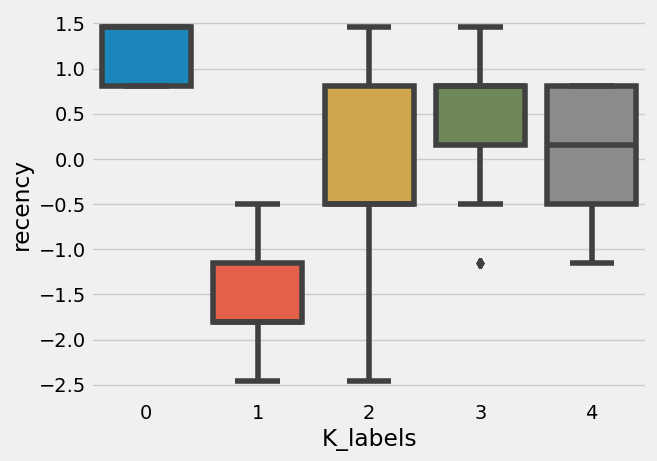

In [59]:
sns.boxplot(x='K_labels', y='recency', data=rfm_vals_normalized)

<Axes: xlabel='K_labels', ylabel='frequency'>

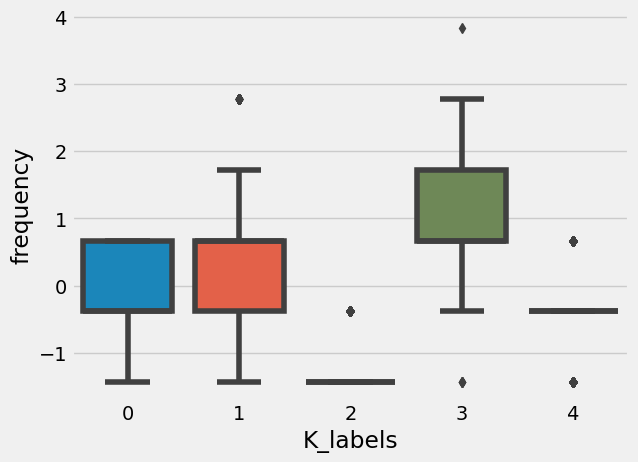

In [74]:
sns.boxplot(x='K_labels', y='frequency', data=rfm_vals_normalized)

<Axes: xlabel='K_labels', ylabel='monetary'>

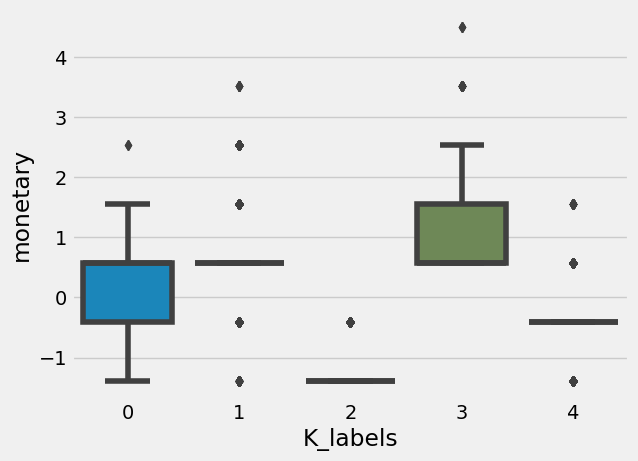

In [75]:
sns.boxplot(x='K_labels', y='monetary', data=rfm_vals_normalized)

In [79]:
rfm_vals_normalized.describe().round(2)

,recency,frequency,monetary,K_labels
count,76435.00,76435.00,76435.00,76435.00
mean,-0.00,0.00,0.00,2.52
std,1.00,1.00,1.00,1.26
min,-2.46,-1.43,-1.39,0.00
25%,-0.50,-0.38,-0.41,2.00
50%,0.15,-0.38,-0.41,3.00
75%,0.80,0.67,0.57,4.00
max,1.45,3.83,4.49,4.00


In [77]:
rfm_vals_normalized.reset_index()

,index,recency,frequency,monetary,K_labels
0,0,0.150268,1.723652,2.530351,3
1,1,0.150268,-0.379544,-0.409001,4
2,2,-0.501738,-0.379544,-0.409001,4
3,3,0.150268,0.672054,1.550567,3
4,4,-0.501738,-1.431142,-1.388784,2
...,...,...,...,...,...
76430,76430,1.454279,-1.431142,-1.388784,2
76431,76431,0.802273,1.723652,1.550567,3
76432,76432,-0.501738,-1.431142,-1.388784,2
76433,76433,0.802273,-0.379544,0.570783,0


TypeError: 'str' object is not callable

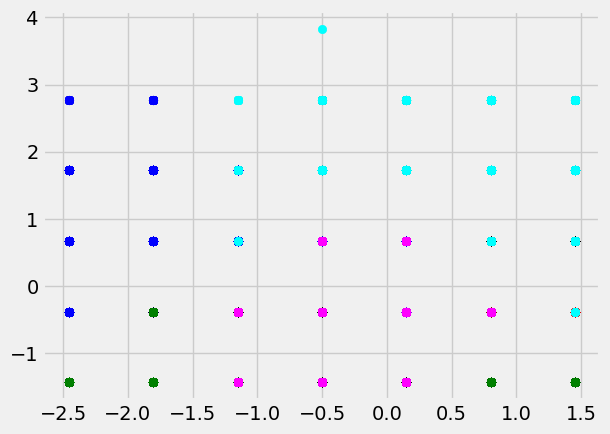

In [80]:
filtered_clusters = [rfm_vals_normalized[rfm_vals_normalized['K_labels'] == i] for i in range(5)]

colors = ['red', 'blue', 'green', 'cyan', 'magenta']

plt.figure()

for i, cluster_data in enumerate(filtered_clusters):
    plt.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], color=colors[i], label=f'Cluster {i + 1}')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans Clustering - 2D Scatter Plot')
plt.legend()

plt.show()

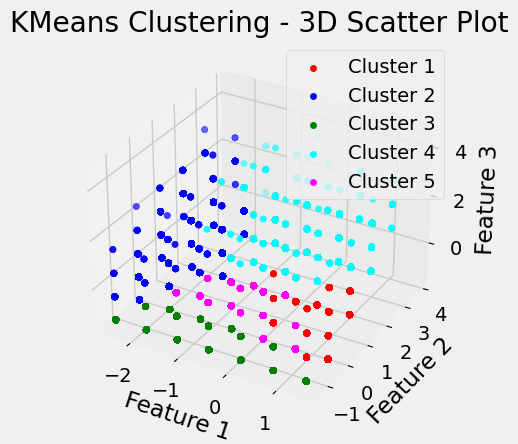

In [70]:
from mpl_toolkits.mplot3d import Axes3D

# Assuming you have 'K_labels' column in rfm_vals_normalized DataFrame
filtered_clusters = [rfm_vals_normalized[rfm_vals_normalized['K_labels'] == i] for i in range(5)]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

colors = ['red', 'blue', 'green', 'cyan', 'magenta']

for i, cluster_data in enumerate(filtered_clusters):
    ax.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], cluster_data.iloc[:, 2], c=colors[i], label=f'Cluster {i + 1}')

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('KMeans Clustering - 3D Scatter Plot')
ax.legend()

plt.show()

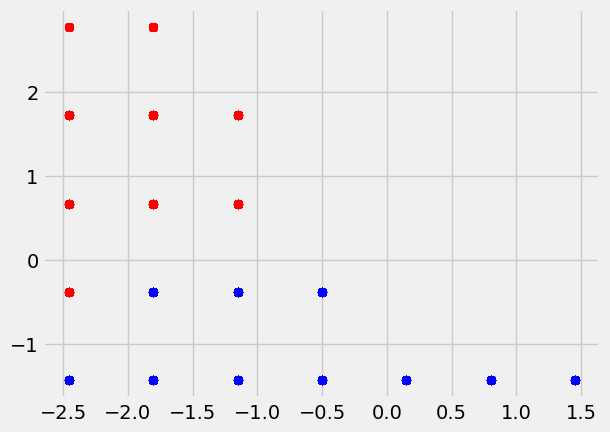

In [69]:
filtered_label_1 = rfm_vals_normalized.loc[rfm_vals_normalized['K_labels'] == 1]
filtered_label_2 = rfm_vals_normalized.loc[rfm_vals_normalized['K_labels'] == 2]

plt.scatter(filtered_label_1.iloc[:, 0], filtered_label_1.iloc[:, 1], color='red', label='Cluster 1')
plt.scatter(filtered_label_2.iloc[:, 0], filtered_label_2.iloc[:, 1], color='blue', label='Cluster 2')
plt.show()

KeyError: 0

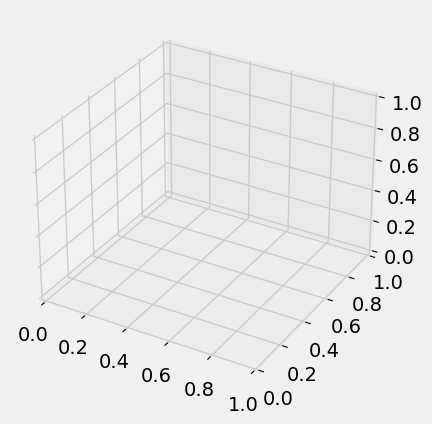

In [64]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
plt.scatter(rfm_vals_normalized.loc[rfm_vals_normalized['K_labels'] == 1, 0], rfm_vals_normalized.loc[rfm_vals_normalized['K_labels'] == 1, 1], s=100, c='blue', label='Cluster 2', axis=1)
plt.scatter(rfm_vals_normalized.loc[rfm_vals_normalized['K_labels'] == 2, 0], rfm_vals_normalized.loc[rfm_vals_normalized['K_labels'] == 2, 1], s=100, c='green', label='Cluster 3', axis=1)
plt.scatter(rfm_vals_normalized.loc[rfm_vals_normalized['K_labels'] == 3, 0], rfm_vals_normalized.loc[rfm_vals_normalized['K_labels'] == 3, 1], s=100, c='cyan', label='Cluster 4', axis=1)



In [ ]:
print(model)

In [ ]:
rfm_vals_normalized.head()